In [1]:
import numpy as np
import brfss
import thinkstats2
import thinkplot

import matplotlib.pyplot as plt

In [2]:
df = brfss.ReadBrfss(nrows=None)
sample = thinkstats2.SampleRows(df, 5000)
heights, weights = sample.htm3, sample.wtkg2

In [3]:
df.head()

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82.0,2,76.363636,185.870345,70.91,157.0
1,65.0,2,72.727273,126.603027,72.73,163.0
2,48.0,2,NaN,181.063210,NaN,165.0
3,61.0,1,73.636364,517.926275,73.64,170.0
4,26.0,1,88.636364,1252.624630,88.64,185.0


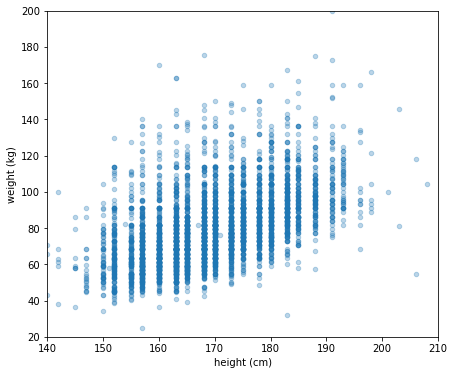

In [4]:
plt.figure(figsize=[7,6])
plt.scatter(heights, weights, s=20, alpha=0.3)
plt.xlim([140, 210])
plt.ylim([20, 200])
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()


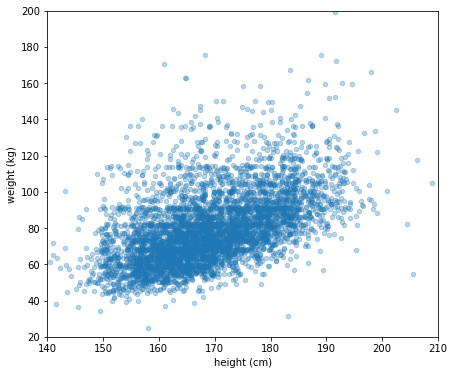

In [5]:
heights = thinkstats2.Jitter(heights, 1.3)
weights = thinkstats2.Jitter(weights, 0.5)

plt.figure(figsize=[7,6])
plt.scatter(heights, weights, s=20, alpha=0.3)
plt.xlim([140, 210])
plt.ylim([20, 200])
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

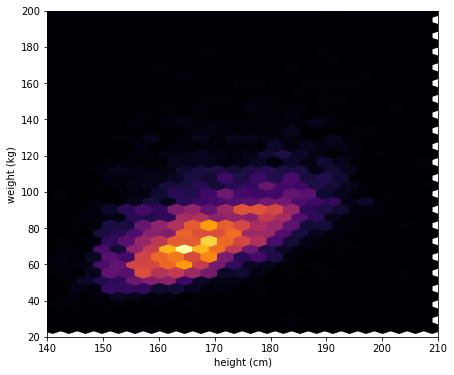

In [6]:
plt.figure(figsize=[7,6])
plt.hexbin(heights, weights, gridsize=35, cmap='inferno')
plt.xlim([140, 210])
plt.ylim([20, 200])
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

In [7]:
df = df.dropna(subset=['htm3', 'wtkg2'])
bins = np.arange(135, 210, 5)
indices = np.digitize(df.htm3, bins)
groups = df.groupby(indices)

In [8]:
indices

array([5, 6, 8, ..., 9, 5, 9])

In [9]:
groups.size()

0       305
1       228
2       477
3      2162
4     18759
5     45761
6     70610
7     72138
8     61725
9     49938
10    43555
11    20077
12     7784
13     1777
14      405
15      131
dtype: int64

In [10]:
# heights = [group.htm3.mean() for i, group in groups]
heights = list(groups.htm3.mean().values)
cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups]

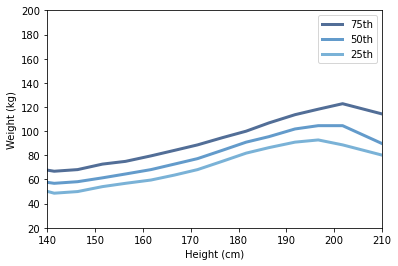

In [11]:
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(heights, weights, label=label)
    
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=True)
    

In [12]:
def cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [13]:
def corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [14]:
def my_corr(xs, ys):
    xs = xs - xs.mean()
    ys = ys - ys.mean()
    
    cov = np.dot(xs, ys)/len(xs)
    corr = cov/(xs.std()*ys.std())
    return corr

In [15]:
test = df.dropna()
my_corr(test.age, test.finalwt)

-0.2720144169909589

In [16]:
import pandas as pd 

def spearman_corr(xs, ys):
    xranks = pd.Series(xs)
    yranks= pd.Series(ys)
    
    return xs.corr(ys, method='spearman')
    

In [17]:
print(corr(df.htm3, df.wtkg2))
print(spearman_corr(df.htm3, df.wtkg2))

0.5087364789734607
0.5405846262320491


In [18]:
thinkstats2.Corr(df.htm3, np.log(df.wtkg2))

0.5317282605983452

In [19]:
# excercise...

In [20]:
import first

live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

In [21]:
age = live.agepreg
weight = live.totalwgt_lb

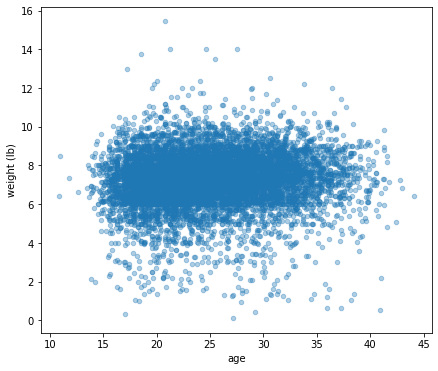

In [31]:
plt.figure(figsize=[7,6])
plt.scatter(age, weight, alpha=0.36, s=20)
plt.xlabel('age')
plt.ylabel('weight (lb)')
plt.savefig('scatter1.png')


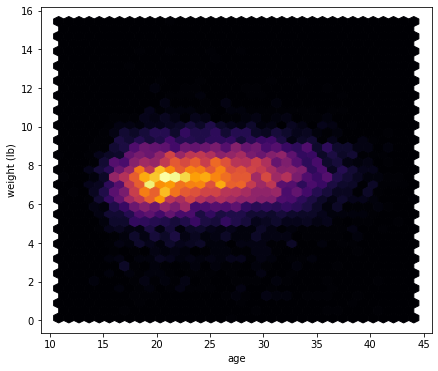

In [32]:
plt.figure(figsize=[7,6])
plt.hexbin(age, weight, gridsize=35, cmap='inferno')
plt.xlabel('age')
plt.ylabel('weight (lb)')
plt.savefig('scatter2.png')

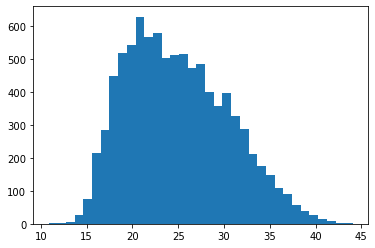

In [24]:
plt.hist(age, bins=35)
plt.show()

In [25]:
print(age.min())
print(age.max())

10.83
44.08


In [26]:
bins = np.arange(15, 42, 3)
indices = np.digitize(age, bins)
groups = live.groupby(indices)

binned_ages = list(groups.agepreg.mean())
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]
print(len(binned_ages))
binned_ages

10


[14.217586206896554,
 16.83997354497349,
 19.526583671106245,
 22.42372250423063,
 25.424321926489732,
 28.381420972644793,
 31.330288844621716,
 34.268199233716466,
 37.19423076923073,
 40.297571428571416]

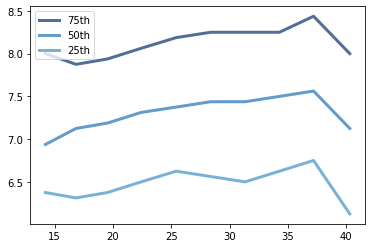

In [33]:
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(binned_ages, weights, label=label)
    
thinkplot.Config(legend=True)
plt.savefig('percentiles.png')

In [28]:
weights

[6.375, 6.3125, 6.375, 6.5, 6.625, 6.5625, 6.5, 6.625, 6.75, 6.125]

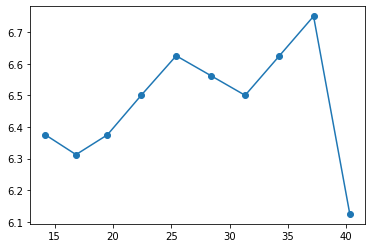

In [29]:
plt.scatter(binned_ages, weights)
plt.plot(binned_ages, weights)

In [30]:
print('Pearson correlation coeff:', corr(age, weight))
print('Spearman correlation coeff:', spearman_corr(age, weight))

Pearson correlation coeff: 0.06883397035410908
Spearman correlation coeff: 0.09461004109658226


![scatter1](scatter1.png)
![scatter2](scatter2.png)
![percentiles](percentiles.png)


Pearson correlation coeff: 0.06883397035410908 <br>
Spearman correlation coeff: 0.09461004109658226 <br><br>

The spearman and pearson correlation coefficients between age and weight are very week<br>
however after looking at the data it's possible that there may be a non linear relationship<br>
between the two.